In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as rcParams
import warnings
import itertools
from scipy import stats

In [2]:
!pip install seaborn


In [3]:
pip install --upgrade seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install --upgrade seaborn matplotlib

In [5]:
customers = pd.read_csv('Mall_Customers.csv')
customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


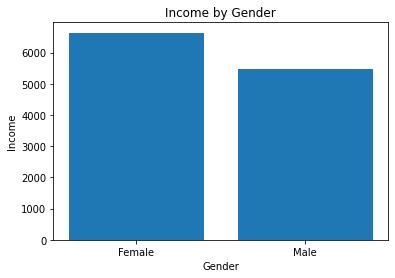

In [8]:
# Melihat perbandingan income market berdasarkan gender menggunakan Bar Chart

incomeGender = customers[['Genre','Annual Income (k$)']].groupby(['Genre'])['Annual Income (k$)'].sum().reset_index()

plt.bar(incomeGender['Genre'],incomeGender['Annual Income (k$)'])
plt.title('Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

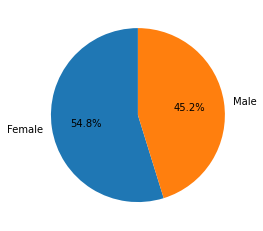

In [9]:
# Melihat perbandingan income market berdasarkan gender menggunakan Pie Chart

plt.pie(incomeGender['Annual Income (k$)'], labels=incomeGender['Genre'], autopct='%1.1f%%', startangle=90)
plt.show()

Text(0.5, 0, 'Spending')

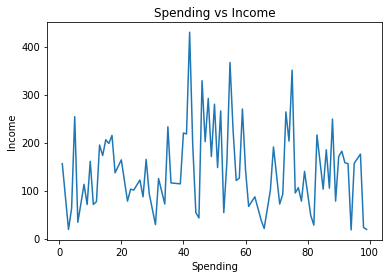

In [10]:
# Menampilkan tingkat pengeluaran dengan pendapatan menggunakan Line Chart

incomeSpending = customers[['Spending Score (1-100)','Annual Income (k$)']].groupby(['Spending Score (1-100)'])['Annual Income (k$)'].sum().reset_index()

plt.plot(incomeSpending['Spending Score (1-100)'],incomeSpending['Annual Income (k$)'])
plt.title('Spending vs Income')
plt.ylabel('Income')
plt.xlabel('Spending')

In [11]:
ageIncomeSpending = customers[['Age','Annual Income (k$)','Spending Score (1-100)']]
ageIncomeSpending.head(9)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3


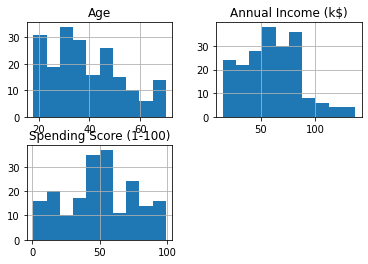

In [12]:
visualization = ageIncomeSpending[['Age','Annual Income (k$)','Spending Score (1-100)']]
visualization.hist()
plt.show()

In [13]:
# Data Preprocessing

nulls = customers.isnull().sum()
nulls_percentage = nulls[nulls!=0]/customers.shape[0]*100
print(round(nulls_percentage,2))

Series([], dtype: float64)


In [14]:
customers[['Age','Annual Income (k$)','Spending Score (1-100)']]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [19]:
valid_columns = customers.select_dtypes(include=[np.number]).columns
customers_mean = customers[valid_columns].fillna(customers[valid_columns].mean())
customers_mean.shape

(200, 4)

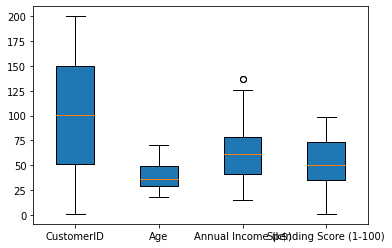

In [20]:
plt.boxplot(customers_mean.values, patch_artist=True, labels=customers_mean.columns)
plt.show()

In [21]:
# Select data with outlier by using Zscore

data_annual = customers[['Annual Income (k$)']]
data_annual

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17
...,...
195,120
196,126
197,126
198,137


In [22]:
stats.zscore(data_annual, nan_policy='omit')

,Annual Income (k$)
0,-1.738999
1,-1.738999
2,-1.700830
3,-1.700830
4,-1.662660
...,...
195,2.268791
196,2.497807
197,2.497807
198,2.917671


In [23]:
# Get data inside 3 sigma

data_zscore=data_annual[(np.abs(stats.zscore(data_annual, nan_policy='omit')) < 3).all(axis=1)]
data_zscore.shape

(200, 1)

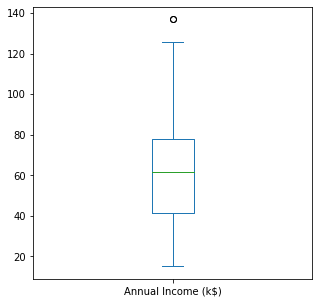

In [24]:
data_zscore.plot(kind='box', figsize=(5,5))
plt.show()

In [25]:
# melakukan metode Linear Regression terhadap data Income vs Spending Market

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

dataSpend = incomeSpending[['Spending Score (1-100)','Annual Income (k$)']]
dataSpend.info()
dataSpend

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Spending Score (1-100)  84 non-null     int64
 1   Annual Income (k$)      84 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB


,Spending Score (1-100),Annual Income (k$)
0,1,156
1,3,19
2,4,63
3,5,254
4,6,34
...,...,...
79,94,18
80,95,157
81,97,176
82,98,23


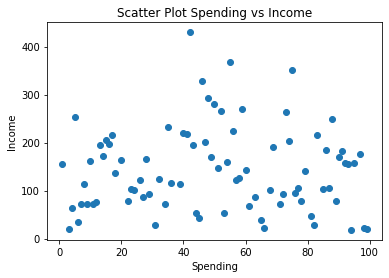

In [26]:
# Melihat korelasi data dengan Scatter Plot

plt.scatter(dataSpend['Spending Score (1-100)'], dataSpend['Annual Income (k$)'])
plt.xlabel('Spending')
plt.ylabel(('Income'))
plt.title('Scatter Plot Spending vs Income')
plt.show()

In [27]:
# Modeling

x = dataSpend['Spending Score (1-100)'].values.reshape(-1,1)
y = dataSpend['Annual Income (k$)'].values.reshape(-1,1)

In [28]:
# Membagi data training dan data testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

In [29]:
LinReg = LinearRegression()
LinReg.fit(x_train,y_train)
LinReg.score(x_test,y_test)

-0.06837003986986057

Text(0.5, 1.0, 'Plot Spending vs Income')

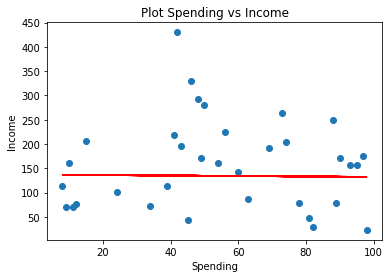

In [30]:
y_predict = LinReg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, c='r')
plt.xlabel('Spending')
plt.ylabel('Income')
plt.title('Plot Spending vs Income')

In [31]:
msk = np.random.rand(len(ageIncomeSpending)) < 0.8
train = ageIncomeSpending[msk]
test = ageIncomeSpending[~msk]

In [32]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Annual Income (k$)']])
train_y = np.asanyarray(train[['Spending Score (1-100)']])
regr.fit(train_x, train_y)

#The Coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.06977327]]
Intercept:  [46.21563461]


In [33]:
# Evaluation

from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Annual Income (k$)']])
test_y = np.asanyarray(test[['Spending Score (1-100)']])
test_y_ = regr.predict(test_x)

print("Mean Absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residuals sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2_score: %.2f" % r2_score(test_y, test_y_))

Mean Absolute error: 19.38
Residuals sum of squares (MSE): 597.47
R2_score: -0.05


In [34]:
%matplotlib inline

In [35]:
customers = customers.drop('Genre', axis =1)

In [36]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


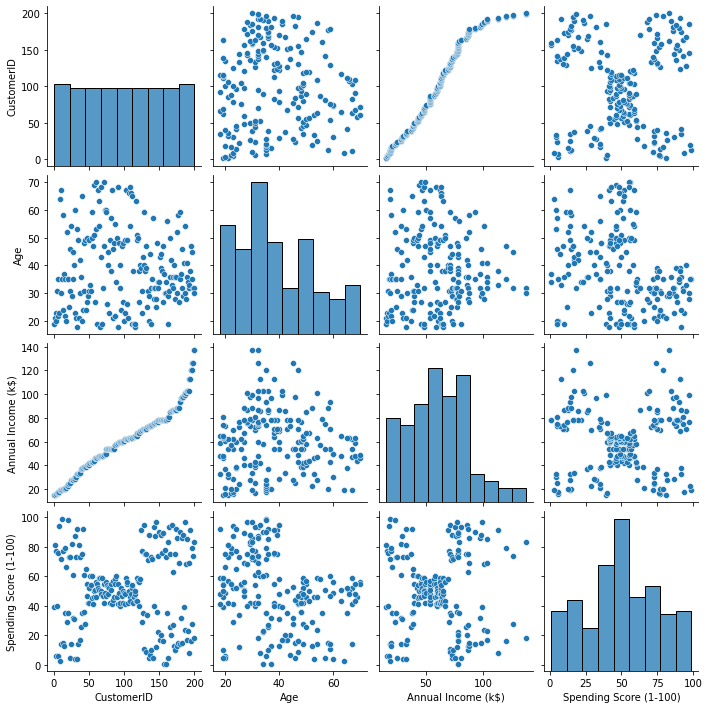

In [37]:
sns.pairplot(customers)

<Axes: ylabel='Frequency'>

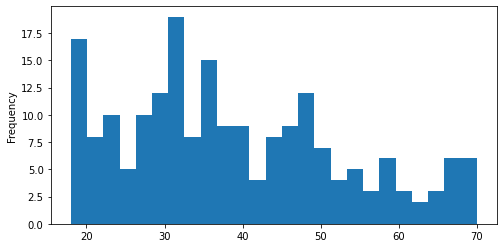

In [38]:
# Distribution

customers['Age'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

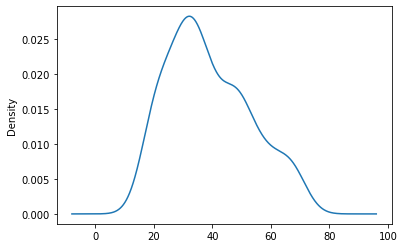

In [39]:
customers['Age'].plot.density()

<Axes: ylabel='Frequency'>

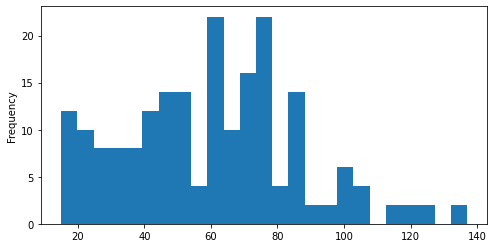

In [40]:
customers['Annual Income (k$)'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

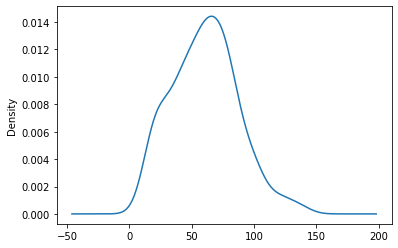

In [41]:
customers['Annual Income (k$)'].plot.density()

<Axes: ylabel='Frequency'>

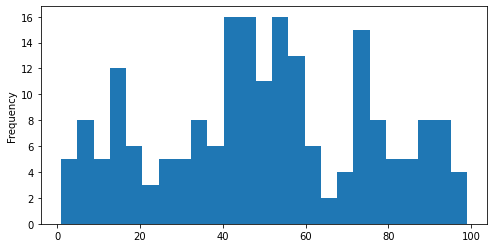

In [42]:
customers['Spending Score (1-100)'].plot.hist(bins=25,figsize=(8,4))

<Axes: ylabel='Density'>

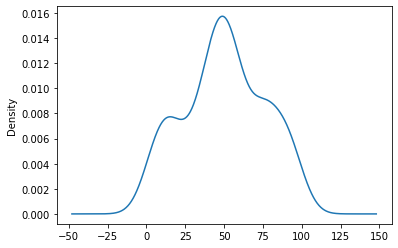

In [43]:
customers['Spending Score (1-100)'].plot.density()

In [44]:
customers.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

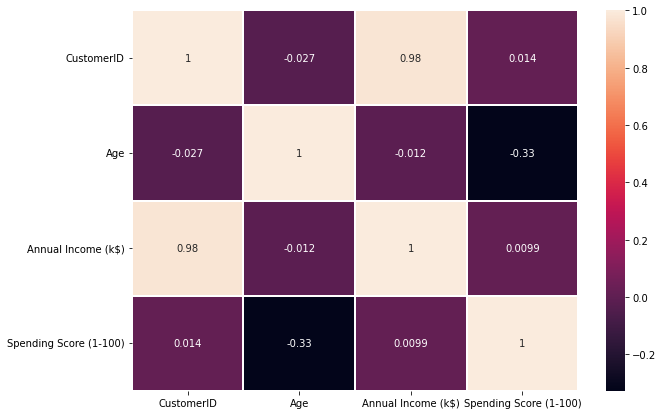

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(customers.corr(),annot=True,linewidths=2)

In [46]:
l_column = list(customers.columns)
len_feature = len(l_column)
l_column

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [47]:
X = customers[l_column[0:len_feature-2]]
y = customers[l_column[len_feature-2]]

In [48]:
print("Feature set size: ",X.shape)
print("Variable set size:",y.shape)

Feature set size:  (200, 2)
Variable set size: (200,)


In [49]:
X.head()

,CustomerID,Age
0,1,19
1,2,21
2,3,20
3,4,23
4,5,31


In [50]:
y.head()

0    15
1    15
2    16
3    16
4    17
Name: Annual Income (k$), dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [53]:
print("Training feature set size: ",X_train.shape)
print("Test feature set size: ",X_test.shape)
print("Training variable set size: ",y_train.shape)
print("Test variable set size: ",y_test.shape)

Training feature set size:  (140, 2)
Test feature set size:  (60, 2)
Training variable set size:  (140,)
Test variable set size:  (60,)


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [56]:
print("The intercept term of the linear model: ", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)

The intercept term of the linear model:  14.31838278473301
The coefficients of the linear model: [0.4560817  0.02320798]


In [57]:
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
cdf

,Coefficients
CustomerID,0.456082
Age,0.023208


In [58]:
n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0,0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
CustomerID,0.456082,0.00914,49.899145
Age,0.023208,0.03708,0.625894


In [59]:
print("Therefore, features arranged in the order of importance for predicting the house price\n",'-'*90,sep='')
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

Therefore, features arranged in the order of importance for predicting the house price
------------------------------------------------------------------------------------------
CustomerID > 
Age


Text(0.5, 1.0, 'Age vs. Annual Income (k$)')

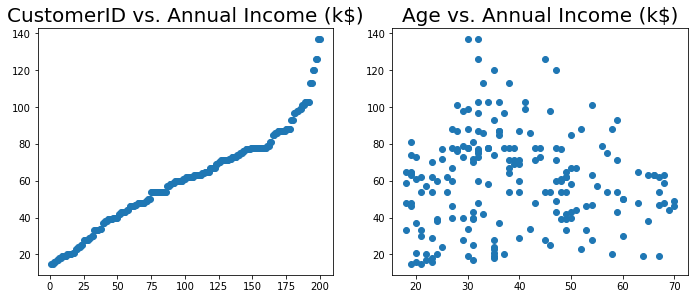

In [60]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)

ax0 = plt.subplot(gs[0])
ax0.scatter(customers[l[0]],customers['Annual Income (k$)'])
ax0.set_title(l[0]+" vs. Annual Income (k$)", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(customers[l[1]],customers['Annual Income (k$)'])
ax1.set_title(l[1]+" vs. Annual Income (k$)", fontdict={'fontsize':20})

Text(0.5, 1.0, 'Age vs. Spending Score (1-100)')

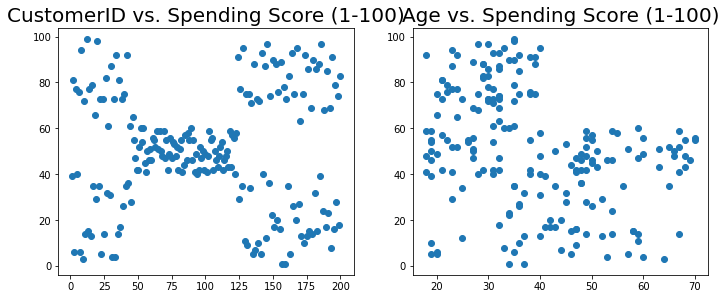

In [61]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)

ax0 = plt.subplot(gs[0])
ax0.scatter(customers[l[0]],customers['Spending Score (1-100)'])
ax0.set_title(l[0]+" vs. Spending Score (1-100)", fontdict={'fontsize':20})

ax1 = plt.subplot(gs[1])
ax1.scatter(customers[l[1]],customers['Spending Score (1-100)'])
ax1.set_title(l[1]+" vs. Spending Score (1-100)", fontdict={'fontsize':20})

In [62]:
print("R-Squared value of this fit:",round(metrics.r2_score(y_train,train_pred),3))

R-Squared value of this fit: 0.947


In [63]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of teh predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of teh predicted object: (60,)


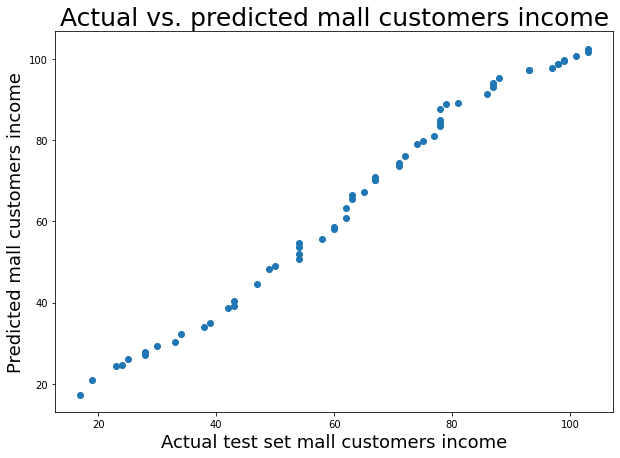

In [64]:
plt.figure(figsize=(10,7))
plt.title("Actual vs. predicted mall customers income",fontsize=25)
plt.xlabel("Actual test set mall customers income",fontsize=18)
plt.ylabel("Predicted mall customers income", fontsize=18)
plt.scatter(x=y_test,y=predictions)

C:\Users\Acer\AppData\Local\Temp\ipykernel_17236\1562080281.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot([y_test-predictions])


<Axes: title={'center': 'Histogram of residuals to check for normality'}, xlabel='Residuals', ylabel='Kernel density'>

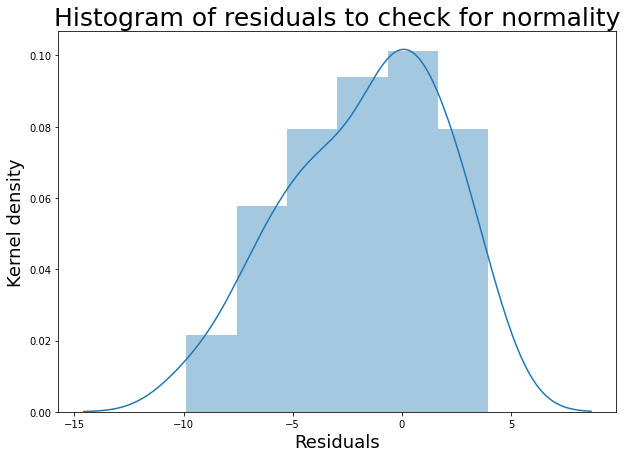

In [65]:
plt.figure(figsize=(10,7))
plt.title("Histogram of residuals to check for normality",fontsize=25)
plt.xlabel("Residuals",fontsize=18)
plt.ylabel("Kernel density", fontsize=18)
sns.distplot([y_test-predictions])

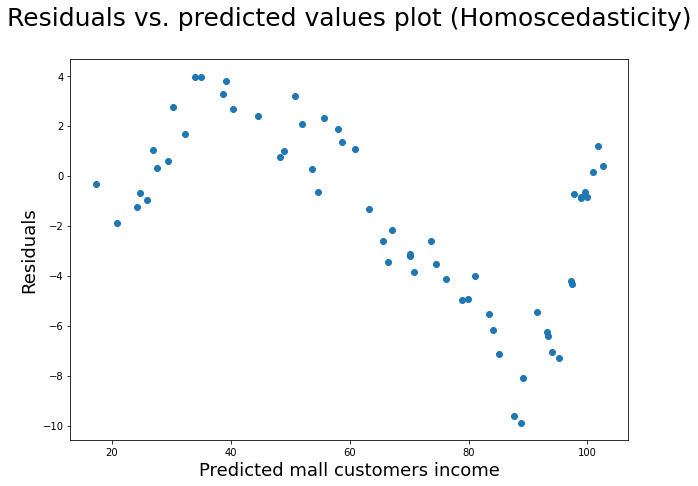

In [66]:
plt.figure(figsize=(10,7))
plt.title("Residuals vs. predicted values plot (Homoscedasticity)\n",fontsize=25)
plt.xlabel("Predicted mall customers income",fontsize=18)
plt.ylabel("Residuals", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

In [67]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 3.054224229717683
Mean square error (MSE): 15.129905888953154
Root mean square error (RMSE): 3.8897179703614957


In [68]:
print("R-squared value of predictions:",round(metrics.r2_score(y_test,predictions),3))

R-squared value of predictions: 0.974


In [69]:
# Comparasion Decision Tree Algorithm vs Logistic Regression Algorithm vs K Nearest Neighbor Algorithm

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Accuracy of Decision Tree Classifier on training setL {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy of Decision Tree Classifier in test set: {:.2f}".format(clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training setL 1.00
Accuracy of Decision Tree Classifier in test set: 0.60


In [70]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Accuracy of Logistic Regression Classifier on training setL {:.2f}".format(logreg.score(X_train, y_train)))
print("Accuracy of Logistic Regression Classifier in test set: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on training setL 0.16
Accuracy of Logistic Regression Classifier in test set: 0.13


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print("Accuracy of K-NN Classifier on training setL {:.2f}".format(knn.score(X_train, y_train)))
print("Accuracy of K-NN Classifier in test set: {:.2f}".format(knn.score(X_test, y_test)))

Accuracy of K-NN Classifier on training setL 0.49
Accuracy of K-NN Classifier in test set: 0.32


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Acer\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`